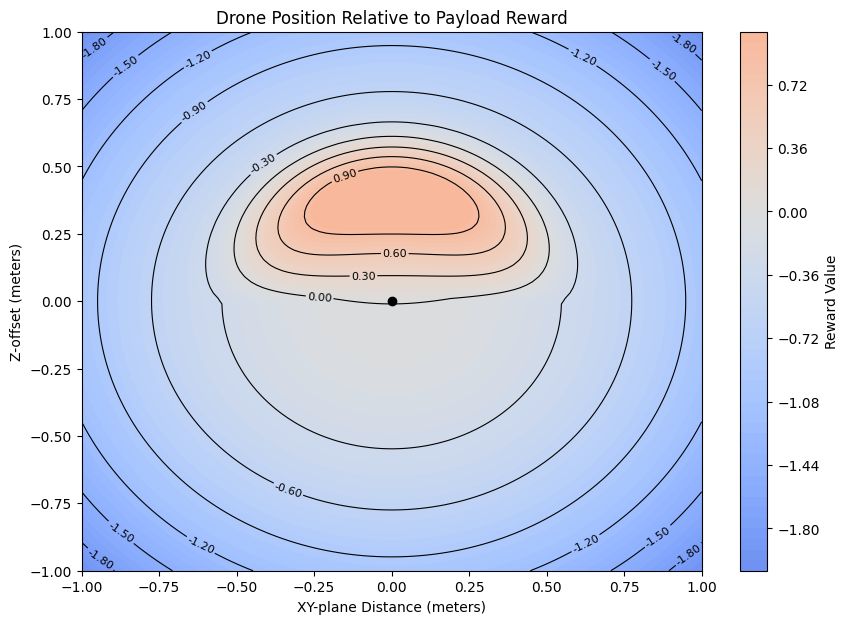

In [43]:
import numpy as np
import matplotlib.pyplot as plt


# Modify the reward function to remove base variance and scale z-offset by 0.5
def reward_function_scaled_z(xy_distance, z_offset):
    """
    Compute the reward based on the xy-plane distance and z-offset.
    Variance scales directly with |z| multiplied by a scaling factor.
    
    Args:
    - xy_distance: Distance in the xy-plane (meters).
    - z_offset: Vertical distance (meters).
    
    Returns:
    - Reward value.
    """
    variance = 0.5 * abs(z_offset)  # Variance scales directly with |z|
    reward = np.exp(-0.5 * (xy_distance ** 3) / variance) * z_offset if variance > 0 else 0.

    
    z_bonus = 2*np.exp(-(z_offset - 0.2 )**2 / 0.5**2)

   
    reward = z_bonus - (xy_distance*2)**2

    drone_radius_ring =  np.exp(-(z_offset**2+xy_distance**2 - 0.05*2)**2 / 0.2**2) * z_offset  if z_offset > 0.0 else 0.0


    reward = 4*drone_radius_ring - (xy_distance)**2 - (z_offset)**2




    # gauss over z_offset
    #reward = np.exp(-0.5 * (z_offset ** 2) / variance) if variance > 0 else 0.0

    reward = min(1.0 , reward)
    return reward 


z_offsets = np.linspace(-1.0, 1.0, 100)
xy_distances = np.linspace(-1.0, 1.0, 100)



X = xy_distances
Z = z_offsets

xy_distances = np.abs(xy_distances)

# Recompute rewards for the scaled z-offset function
reward_values_scaled_z = np.array([
    [reward_function_scaled_z(d, z) for d in xy_distances] for z in z_offsets
])

# Create the 2D color plot with contour lines
plt.figure(figsize=(10, 7))

# Plot the heatmap clamped to -1 to 1
contourf = plt.contourf(X, Z, reward_values_scaled_z, levels=50, cmap='coolwarm' , vmin=-3, vmax=3)

# Overlay contour lines 
contour = plt.contour(X, Z, reward_values_scaled_z, levels=10, colors='black', linewidths=0.8, linestyles='solid')
plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

#mark 0 point wiht dot
plt.plot(0, 0, 'ko')


# Add colorbar and labels
plt.colorbar(contourf, label='Reward Value')
plt.xlabel('XY-plane Distance (meters)')
plt.ylabel('Z-offset (meters)')
plt.title('Drone Position Relative to Payload Reward')

plt.show()

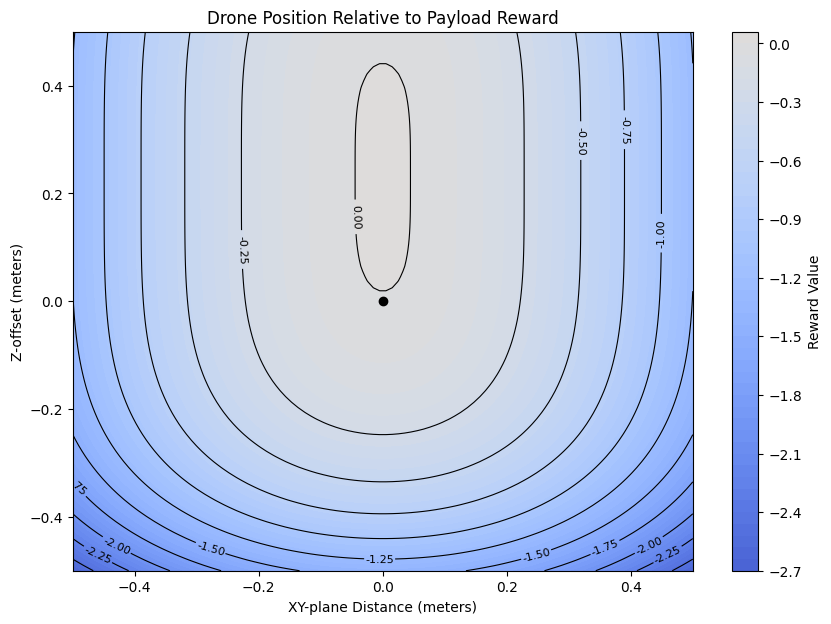

In [91]:
import numpy as np
import matplotlib.pyplot as plt


# Modify the reward function to remove base variance and scale z-offset by 0.5
def reward_function_scaled_z(xy_distance, z_offset):
    """
    Compute the reward based on the xy-plane distance and z-offset.
    Variance scales directly with |z| multiplied by a scaling factor.
    
    Args:
    - xy_distance: Distance in the xy-plane (meters).
    - z_offset: Vertical distance (meters).
    
    Returns:
    - Reward value.
    """
    

    drone_radius_ring =  np.exp(-(z_offset**2+xy_distance**2 - 0.05*2)**2 / 0.05**2) * z_offset  if z_offset > 0.0 else 0.0


    above_payload_bonus = np.exp(-(z_offset - 0.2)**2 / 0.1*2)

    


    reward = 5 * (.002-(z_offset - 0.23)**4 - (xy_distance)**2)


    

    



    # gauss over z_offset
    #reward = np.exp(-0.5 * (z_offset ** 2) / variance) if variance > 0 else 0.0

    #reward = min(1.0 , reward)
    return reward 


z_offsets = np.linspace(-1.0, 1.0, 100)
xy_distances = np.linspace(-1.0, 1.0, 100)


z_offsets = np.linspace(-0.5, 0.5, 100)
xy_distances = np.linspace(-0.5, 0.5, 100)

X = xy_distances
Z = z_offsets

xy_distances = np.abs(xy_distances)

# Recompute rewards for the scaled z-offset function
reward_values_scaled_z = np.array([
    [reward_function_scaled_z(d, z) for d in xy_distances] for z in z_offsets
])

# Create the 2D color plot with contour lines
plt.figure(figsize=(10, 7))

# Plot the heatmap clamped to -1 to 1
contourf = plt.contourf(X, Z, reward_values_scaled_z, levels=50, cmap='coolwarm' , vmin=-3, vmax=3)

# Overlay contour lines 
contour = plt.contour(X, Z, reward_values_scaled_z, levels=10, colors='black', linewidths=0.8, linestyles='solid')
plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

#mark 0 point wiht dot
plt.plot(0, 0, 'ko')


# Add colorbar and labels
plt.colorbar(contourf, label='Reward Value')
plt.xlabel('XY-plane Distance (meters)')
plt.ylabel('Z-offset (meters)')
plt.title('Drone Position Relative to Payload Reward')

plt.show()